In [1]:
options(device=pdf) # turn off flashy window on each block execution
# par(mar=c(4,4,0,1)+0.1)
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
data(state)
statedata = data.frame(state.x77)

In [3]:
lin = lm(Life.Exp ~ ., data=statedata)
summary(lin)


Call:
lm(formula = Life.Exp ~ ., data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
HS.Grad      4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10


In [6]:
# sum of squared errors
pred = predict(lin)
sse = sum((pred - statedata$Life.Exp)^2)
sse
# alternatively
sum(lin$residuals^2)

[1] 23.29714

[1] 23.29714

In [9]:
lin2 = lm(Life.Exp ~ Population + Murder + Frost + HS.Grad, data=statedata)
summary(lin2)


Call:
lm(formula = Life.Exp ~ Population + Murder + Frost + HS.Grad, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47095 -0.53464 -0.03701  0.57621  1.50683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.103e+01  9.529e-01  74.542  < 2e-16 ***
Population   5.014e-05  2.512e-05   1.996  0.05201 .  
Murder      -3.001e-01  3.661e-02  -8.199 1.77e-10 ***
Frost       -5.943e-03  2.421e-03  -2.455  0.01802 *  
HS.Grad      4.658e-02  1.483e-02   3.142  0.00297 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7197 on 45 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7126 
F-statistic: 31.37 on 4 and 45 DF,  p-value: 1.696e-12


In [10]:
# sum of squared errors
pred = predict(lin2)
sse = sum((pred - statedata$Life.Exp)^2)
sse
# alternatively
sum(lin2$residuals^2)

[1] 23.30804

[1] 23.30804

In [11]:
library(rpart)
library(rpart.plot)

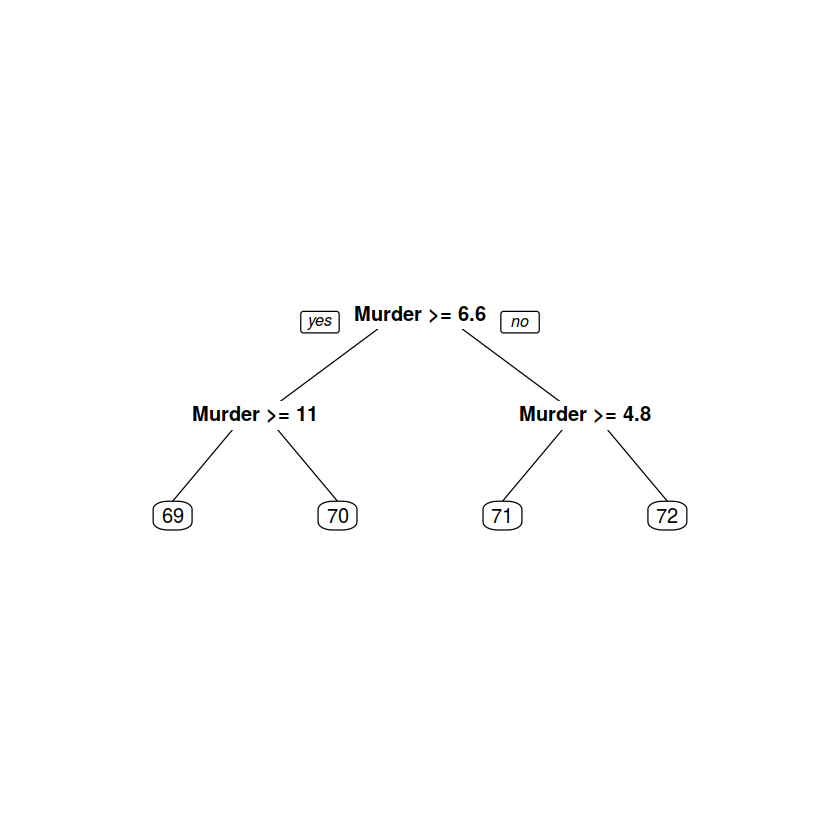

In [12]:
tree = rpart(Life.Exp ~ .,
             data=statedata)
#options(repr.plot.width=7, repr.plot.height=7)
prp(tree)

In [13]:
# sum of squared errors
pred = predict(tree)
sse = sum((pred - statedata$Life.Exp)^2)
sse

[1] 28.99848

[1] 23.64283

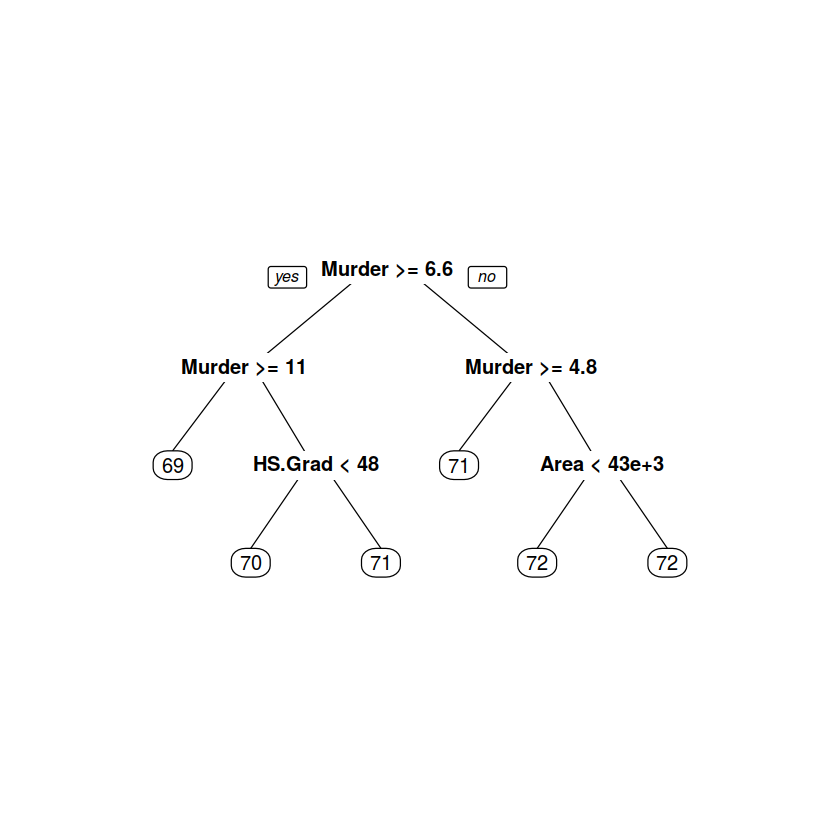

In [14]:
tree = rpart(Life.Exp ~ .,
             data=statedata,
             minbucket=5)

# sum of squared errors
pred = predict(tree)
sse = sum((pred - statedata$Life.Exp)^2)
sse

#options(repr.plot.width=7, repr.plot.height=7)
prp(tree)

[1] 9.312442

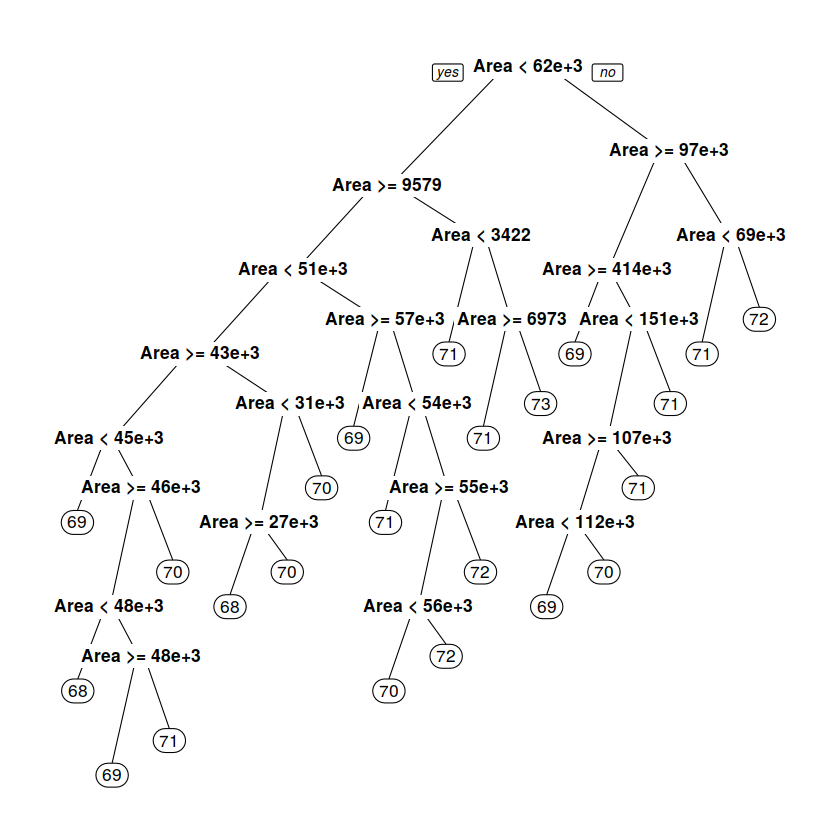

In [15]:
tree = rpart(Life.Exp ~ Area,
             data=statedata,
             minbucket=1)

# sum of squared errors
pred = predict(tree)
sse = sum((pred - statedata$Life.Exp)^2)
sse

#options(repr.plot.width=7, repr.plot.height=7)
prp(tree)

In [17]:
library(caret)
set.seed(111)
tr.control = trainControl(method='cv', number=10)
cp.grid = expand.grid(.cp=seq(0.01, 0.50, 0.01))
train(Life.Exp ~ ., data=statedata, method='rpart',
      trControl=tr.control, tuneGrid=cp.grid)

Warning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

CART 

50 samples
 7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 45, 45, 46, 45, 45, 43, ... 
Resampling results across tuning parameters:

  cp    RMSE       Rsquared 
  0.01  0.9710867  0.5079610
  0.02  0.9710867  0.5079610
  0.03  0.9851044  0.4959796
  0.04  0.9914151  0.4959796
  0.05  0.9914151  0.4959796
  0.06  0.9796163  0.5147632
  0.07  0.9709231  0.5380553
  0.08  0.9709231  0.5380553
  0.09  0.9709231  0.5380553
  0.10  0.9709231  0.5380553
  0.11  0.9709231  0.5380553
  0.12  0.9709231  0.5380553
  0.13  1.0467593  0.4623293
  0.14  1.0467593  0.4623293
  0.15  1.0811534  0.4478183
  0.16  1.1430940  0.3916691
  0.17  1.1430940  0.3916691
  0.18  1.1315421  0.3916691
  0.19  1.1315421  0.3916691
  0.20  1.1315421  0.3916691
  0.21  1.1315421  0.3916691
  0.22  1.1315421  0.3916691
  0.23  1.1390467  0.3812782
  0.24  1.1390467  0.3812782
  0.25  1.1390467  0.3812782
  0.26  1.1390467  0.3812782
  0.27  1.1390467  0.3812782

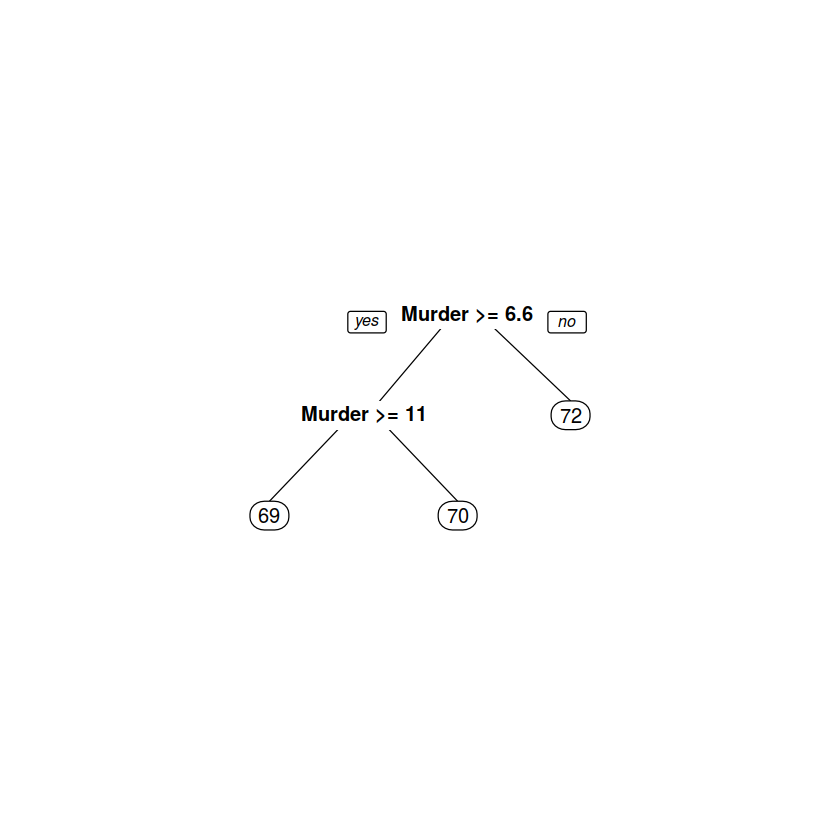

In [18]:
tree = rpart(Life.Exp ~ .,
             data=statedata,
             cp=0.12)
#options(repr.plot.width=7, repr.plot.height=7)
prp(tree)

In [19]:
# sum of squared errors
pred = predict(tree)
sse = sum((pred - statedata$Life.Exp)^2)
sse

[1] 32.86549

In [20]:
set.seed(111)
tr.control = trainControl(method='cv', number=10)
cp.grid = expand.grid(.cp=seq(0.01, 0.50, 0.01))
train(Life.Exp ~ Area, data=statedata, method='rpart',
      trControl=tr.control, tuneGrid=cp.grid)

Warning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

CART 

50 samples
 7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 45, 45, 46, 45, 45, 43, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared 
  0.01  1.205723  0.5389506
  0.02  1.205723  0.5389506
  0.03  1.219739  0.5055887
  0.04  1.219739  0.5055887
  0.05  1.219739  0.5055887
  0.06  1.232473  0.5045906
  0.07  1.281022  0.5412386
  0.08  1.298106  0.5162642
  0.09  1.313189  0.5006905
  0.10  1.313189  0.5006905
  0.11  1.313189  0.5006905
  0.12  1.301598  0.5006905
  0.13  1.381009  0.4212663
  0.14  1.381009  0.4212663
  0.15  1.400114  0.4462950
  0.16  1.440090  0.3878287
  0.17  1.436418  0.4158177
  0.18  1.436418  0.4158177
  0.19  1.436418  0.4158177
  0.20  1.436418  0.4158177
  0.21  1.368197  0.4103372
  0.22  1.368197  0.4103372
  0.23  1.368197  0.4103372
  0.24  1.368197  0.4103372
  0.25  1.368197  0.4103372
  0.26  1.368197  0.4103372
  0.27  1.316606        NaN
  0.28  1.316606        NaN

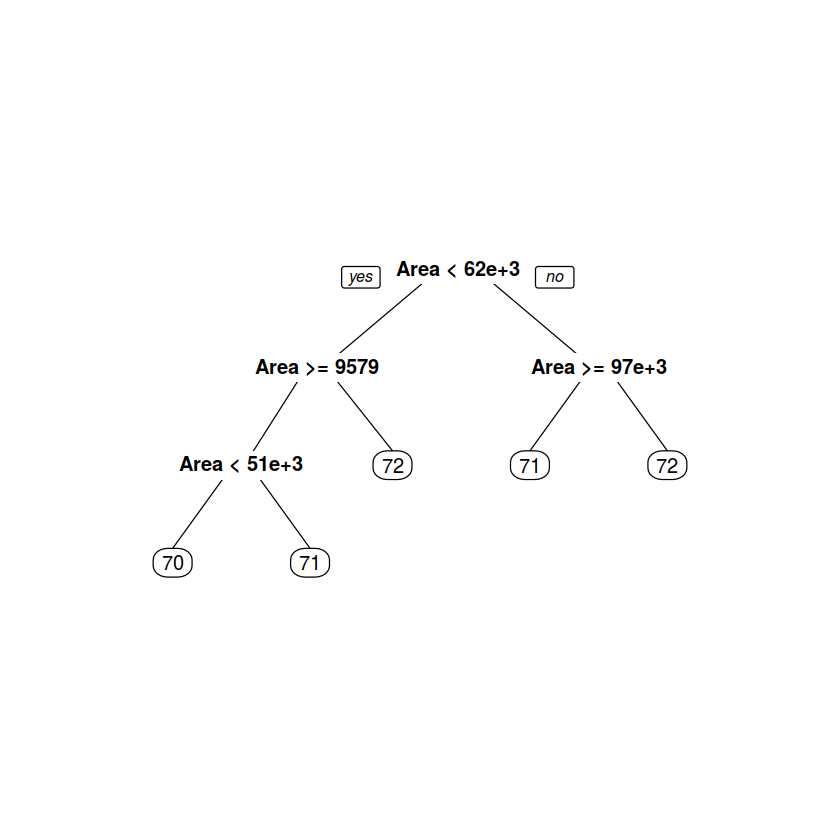

In [22]:
tree = rpart(Life.Exp ~ Area,
             data=statedata,
             cp=0.02)
#options(repr.plot.width=7, repr.plot.height=7)
prp(tree)

In [23]:
# sum of squared errors
pred = predict(tree)
sse = sum((pred - statedata$Life.Exp)^2)
sse

[1] 44.26817